In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
ro=['CDO7252998062998','CDO5064618063001','CDO3042698063020','CDO7893378063026','CDO4604228063028','CDO7821968063031',
   'CDO5072238063046','CDO4981038063054','CDO4725178063056','CDO5209078063060','CDO699718063062','CDO4894288063064',
   'CDO1632508063066','CDO8765068063068','CDO9993348063070']
hu=['CDO5941998062972','CDO5285728062974','CDO3021588062978','CDO9675788062981']

In [43]:
p='C:/Users/csala/Onedrive - Lancaster University/Datarepo/szekelydata/klima/'

In [44]:
stations=pd.read_csv(p+'stations.csv')

In [76]:
dfs=[]
for i in hu:
    df=pd.read_csv(p+'daily/raw/hu/'+i+'.txt',dtype={' FRSHTT':str,' YEARMODA':str})
    dfs.append(df)
    print(i)

CDO5941998062972
CDO5285728062974
CDO3021588062978
CDO9675788062981


In [77]:
for i in ro:
    df=pd.read_csv(p+'daily/raw/ro/'+i+'.txt',dtype={' FRSHTT':str,' YEARMODA':str})
    dfs.append(df)
    print(i)

CDO7252998062998
CDO5064618063001
CDO3042698063020
CDO7893378063026
CDO4604228063028
CDO7821968063031
CDO5072238063046
CDO4981038063054
CDO4725178063056
CDO5209078063060
CDO699718063062
CDO4894288063064
CDO1632508063066
CDO8765068063068
CDO9993348063070


In [78]:
dfs=pd.concat(dfs)

In [88]:
year_fixer={'199710':'19971001'}

In [89]:
dfs['time']=pd.to_datetime(dfs[' YEARMODA'].str.strip().replace(year_fixer),format='%Y%m%d')

In [91]:
dfs.head()

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,...,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22,time
0,127560,99999,20150101,24.2,6.0,16.9,6.0,1036.1,6.0,1016.1,...,5.0,7.8,999.9,27.3,20.8*,0.00I,999.9,000000,NaN,2015-01-01
1,127560,99999,20150102,25.6,8.0,23.9,8.0,1030.7,8.0,1010.9,...,6.0,7.8,999.9,31.8*,21.2,0.02E,999.9,000000,NaN,2015-01-02
2,127560,99999,20150103,34.4,8.0,30.0,8.0,1023.9,8.0,1004.6,...,8.0,15.5,999.9,40.5,28.0,0.00I,999.9,000000,NaN,2015-01-03
3,127560,99999,20150104,33.6,7.0,30.4,7.0,1016.6,7.0,997.3,...,7.0,13.6,999.9,40.8,28.4*,0.04A,999.9,000000,NaN,2015-01-04
4,127560,99999,20150105,27.2,12.0,24.0,12.0,1022.6,12.0,1003.0,...,10.0,11.7,999.9,37.4,18.3*,0.00G,999.9,000000,NaN,2015-01-05


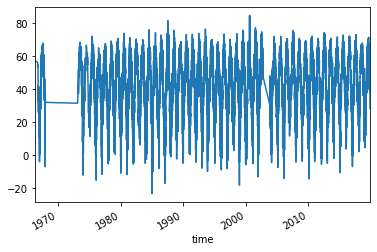

In [92]:
stn=151700
d=dfs[dfs['STN---']==stn]
d.set_index('time')['   TEMP'].plot()

In [93]:
for stn in dfs['STN---'].unique():
    d=dfs[dfs['STN---']==stn]
    d.to_csv(p+'daily/export/'+str(stn)+'.csv')
    print(stn)

127560
127660
127720
127860
128050
128120
128150
128220
128250
128300
128360
128390
128430
128460
128470
128510
128600
128605
128660
128700
128820
128920
129100
129150
129200
129220
129250
129300
129350
129420
129500
129600
129700
129820
129920
128603
129320
697204
128305
128380
128400
128601
129400
119000
150001
150010
150850
150940
151240
151500
151630
151970
152000
152005
152080
152090
152150
152190
152210
152790
152850
152890
153410
153660
153890
154120
154200
154650
154790
154890
154940
150105
150000
150002
150040
150070
150100
150140
150150
150200
150230
150250
150330
150420
150440
150470
150560
150630
150690
150730
150800
150830
150880
150900
150950
150990
151070
151080
151090
151110
151130
151170
151180
151190
151200
151230
151270
151360
151380
151430
151450
151480
151540
151600
151620
151650
151680
151700
151790
151820
151840
151890
151940
151990
152040
152060
152170
152300
152310
152350
152380
152450
152470
152540
152600
152610
152620
152640
152650
152700
152770
152800
152840

Determine most frequent

In [120]:
for i in np.sort(dfs.groupby('STN---').count()['time'].sort_values(ascending=False).head(50).index):
    print("'"+str(i)+"',")

'127720',
'128050',
'128120',
'128220',
'128250',
'128300',
'128390',
'128430',
'128510',
'128600',
'128820',
'128920',
'129100',
'129150',
'150040',
'150100',
'150140',
'150150',
'150200',
'150230',
'150800',
'150850',
'150900',
'151080',
'151200',
'151450',
'151500',
'151700',
'151970',
'152000',
'152300',
'152350',
'152470',
'152600',
'152800',
'152920',
'153100',
'153350',
'153460',
'153500',
'153600',
'154100',
'154200',
'154210',
'154500',
'154600',
'154700',
'154800',
'154810',
'154990',
